Distribusi Tingkat Keparahan:
riesgo_hipertension
1    2816
0    1547
Name: count, dtype: int64
Akurasi: 0.7937356760886173
Confusion Matrix:
 [[258 206]
 [ 64 781]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.56      0.66       464
           1       0.79      0.92      0.85       845

    accuracy                           0.79      1309
   macro avg       0.80      0.74      0.75      1309
weighted avg       0.79      0.79      0.78      1309



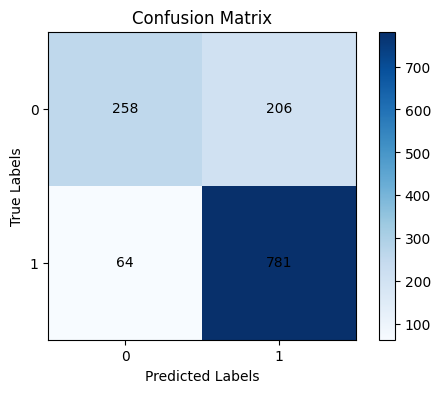

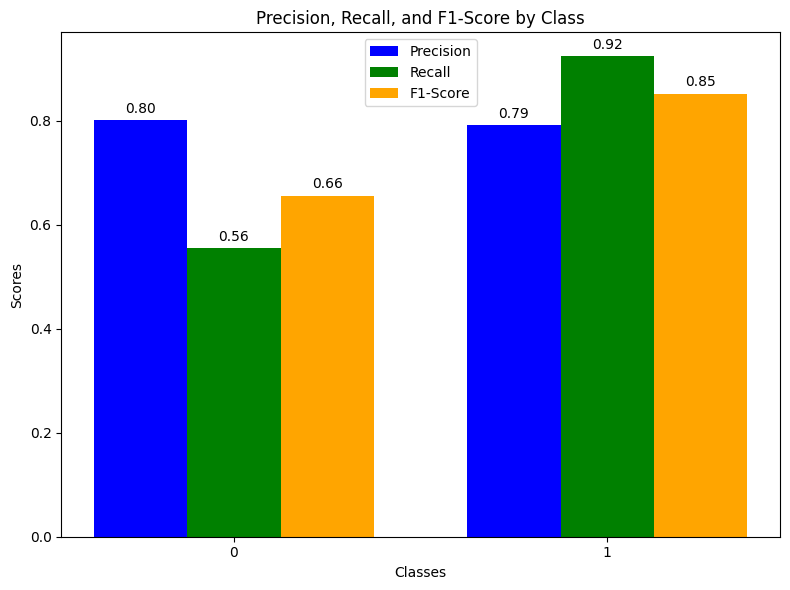

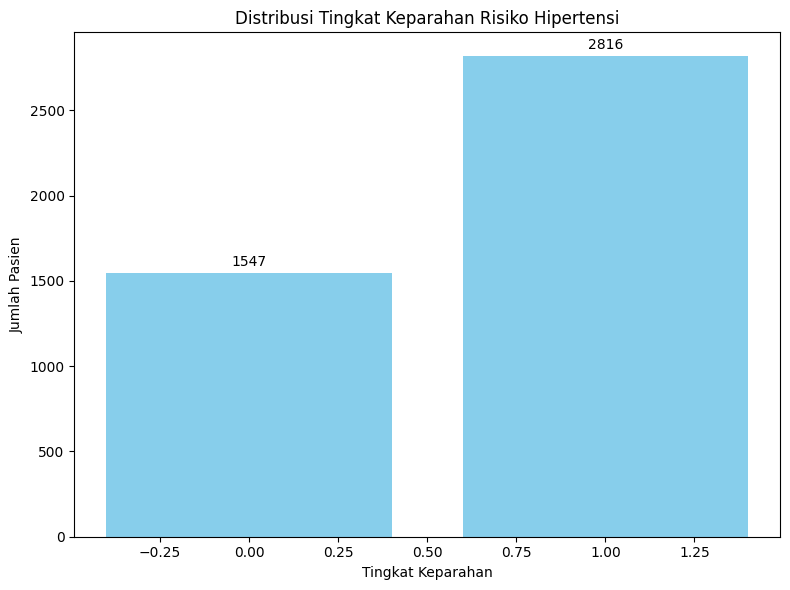

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Memuat dataset
file_path = 'Hipertension_Arterial_Mexico.csv'
data = pd.read_csv(file_path)

# Meninjau distribusi kelas pada target (risiko hipertensi)
print("Distribusi Tingkat Keparahan:")
print(data['riesgo_hipertension'].value_counts())

# Menghapus kolom yang tidak relevan
data_cleaned = data.drop(columns=['FOLIO_I'])

# Memisahkan fitur (X) dan target (y)
X = data_cleaned.drop(columns=['riesgo_hipertension'])
y = data_cleaned['riesgo_hipertension']

# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Melatih model Naive Bayes
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Prediksi pada data testing
y_pred = model.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Akurasi:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Visualisasi Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 4))
conf_matrix_display = ax.imshow(conf_matrix, cmap='Blues')

# Menambahkan teks pada kotak Confusion Matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black")

# Konfigurasi Confusion Matrix Plot
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticks(np.arange(conf_matrix.shape[1]))
ax.set_yticks(np.arange(conf_matrix.shape[0]))
ax.set_xticklabels(sorted(y.unique()))
ax.set_yticklabels(sorted(y.unique()))
plt.colorbar(conf_matrix_display)
plt.show()

# Visualisasi Precision, Recall, dan F1-Score
report_dict = classification_report(y_test, y_pred, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
classes = list(report_dict.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

# Extracting metric values
values = {metric: [report_dict[cls][metric] for cls in classes] for metric in metrics}

x = np.arange(len(classes))  # Group positions
width = 0.25  # Width of bars

fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the bars
rects1 = ax.bar(x - width, values['precision'], width, label='Precision', color='blue')
rects2 = ax.bar(x, values['recall'], width, label='Recall', color='green')
rects3 = ax.bar(x + width, values['f1-score'], width, label='F1-Score', color='orange')

# Adding labels and titles
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Adding values on top of the bars
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text position
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Menghitung distribusi tingkat keparahan
severity_counts = data['riesgo_hipertension'].value_counts()

# Membuat bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(severity_counts.index, severity_counts.values, color='skyblue')

# Menambahkan anotasi pada setiap bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset text position
                textcoords="offset points",
                ha='center', va='bottom')

# Menambahkan judul dan label
ax.set_title('Distribusi Tingkat Keparahan Risiko Hipertensi')
ax.set_xlabel('Tingkat Keparahan')
ax.set_ylabel('Jumlah Pasien')

# Menampilkan grafik
plt.tight_layout()
plt.show()
